## LGBM

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 18589, number of used features: 30
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Start training from score 2.635294
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[CV] END feature_fraction=0.8, learning_rate=0.01, max_depth=-1, n_estimators=100, num_leaves=64; t

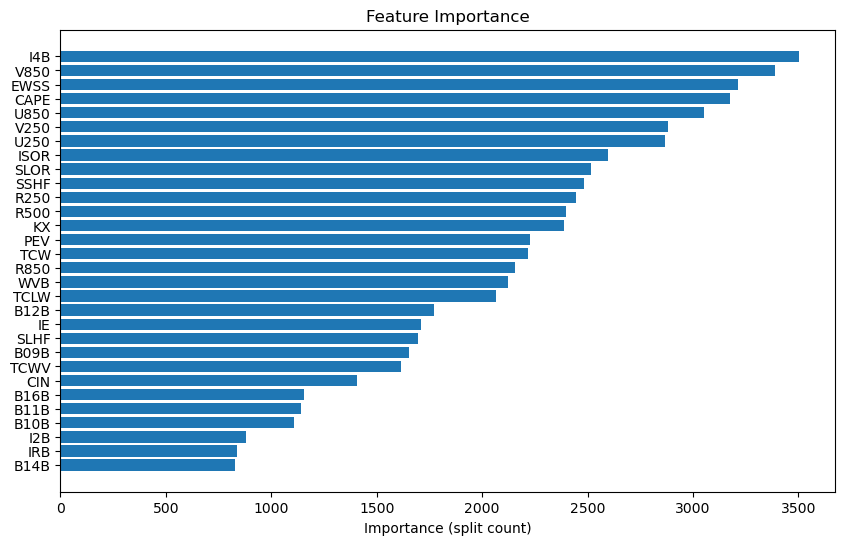

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Predictions for the entire dataset saved to 'rainfall_lgbm.csv'.


In [6]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('datasets/cleaned_normalized_rainfall_data.csv')

# Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value']  # Exclude these from features
X = df_no_nulls.drop(columns=protected_features)  # Feature set
y = df_no_nulls['aws_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1],
    'num_leaves': [64, 128],
    'max_depth': [-1, 8, 16],
    'feature_fraction': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 500, 1000]
}

# Initialize the LightGBM regressor
lgb_model = LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt')

# Set up the grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot feature importance of the best model
importance = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance (split count)')
plt.show()

# Make predictions for the entire dataset using the best model
y_pred_full = best_model.predict(X)

# Add the predictions as a new column in the original DataFrame
df_no_nulls['lgbm_aws_value'] = y_pred_full

# Save the updated DataFrame to a new CSV file
df_no_nulls.to_csv('ensemble_data/rainfall_lgbm.csv', index=False)

print("Predictions for the entire dataset saved to 'rainfall_lgbm.csv'.")


# Random Forest

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages

Best parameters found:  {'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 500}
RMSE: 3.4746
R²: 0.5268


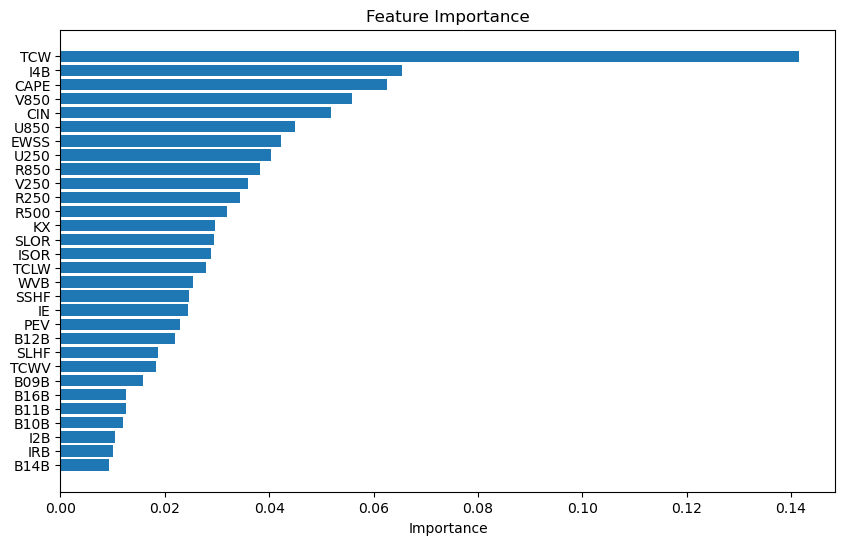

Predictions for the entire dataset saved to 'rainfall_lgbm_rf.csv'.


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm.csv')

# Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value']  # Exclude these from features
X = df_no_nulls.drop(columns=protected_features)  # Feature set
y = df_no_nulls['aws_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [8, 16, 24],
    'min_samples_split': [1, 3, 5],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot feature importance of the best model
importance = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# Make predictions for the entire dataset using the best model
y_pred_full = best_model.predict(X)

# Add the predictions as a new column in the original DataFrame
df_no_nulls['rf_aws_value'] = y_pred_full

# Save the updated DataFrame to a new CSV file
df_no_nulls.to_csv('ensemble_data/rainfall_lgbm_rf.csv', index=False)

print("Predictions for the entire dataset saved to 'rainfall_lgbm_rf.csv'.")


# XGBoost

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=100, objective=reg:squarederror; total time=   0.6s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=100, objective=reg:squarederror; total time=   0.4s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=100, objective=reg:squarederror; total time=   0.4s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=200, objective=reg:squarederror; total time=   0.9s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=200, objective=reg:squarederror; total time=   0.9s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=200, objective=reg:squarederror; total time=   1.0s
[CV] END eval_metric=rmse, learning_rate=0.01, max_depth=8, max_leaves=64, n_estimators=500, objec

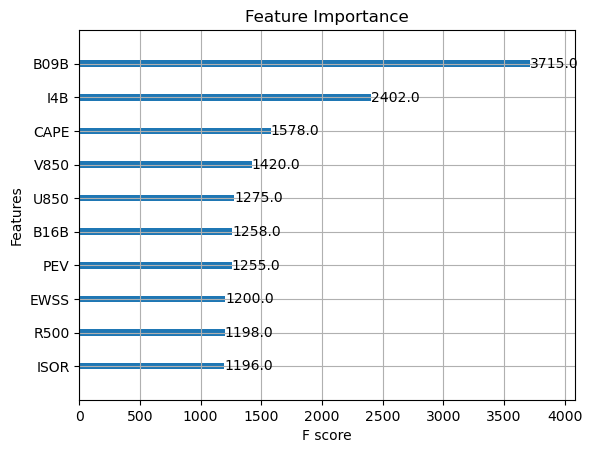

Predictions for the entire dataset saved to 'rainfall_lgbm_rf_xgb.csv'.


In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf.csv')

# Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value', 'rf_aws_value']
X = df_no_nulls.drop(columns=protected_features)
y = df_no_nulls['aws_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [8, 16, 24],
    'n_estimators': [100, 200, 500, 1000],
    'max_leaves': [64, 128],
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse']
}

# Initialize the model
xgb_model = XGBRegressor()

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot feature importance of the best model
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

# Use the best model for full dataset predictions
y_pred_full = best_model.predict(X)

# Add the predictions as a new column in the original DataFrame
df_no_nulls['xgb_aws_value'] = y_pred_full

# Save the updated DataFrame to a new CSV file
df_no_nulls.to_csv('ensemble_data/rainfall_lgbm_rf_xgb.csv', index=False)

print("Predictions for the entire dataset saved to 'rainfall_lgbm_rf_xgb.csv'.")


# Dense NN

Epoch 1/200


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27.2408 - rmse: 5.2170 - val_loss: 21.0143 - val_rmse: 4.5841
Epoch 2/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.1479 - rmse: 4.4854 - val_loss: 20.0169 - val_rmse: 4.4740
Epoch 3/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.4646 - rmse: 4.5222 - val_loss: 19.2494 - val_rmse: 4.3874
Epoch 4/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.8102 - rmse: 4.4444 - val_loss: 18.9754 - val_rmse: 4.3561
Epoch 5/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.6924 - rmse: 4.4332 - val_loss: 18.5656 - val_rmse: 4.3088
Epoch 6/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.1840 - rmse: 4.4838 - val_loss: 18.6593 - val_rmse: 4.3196
Epoch 7/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.3590 - rmse: 4.2824 - val_loss: 18.2330 - val_rmse: 4.2700
Epoch 8/200
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.9449 - rmse: 4.4518 - val_loss: 17.8738 - val_rmse: 4.2277
Epoch 9/200
436/436 ━━━━━━━━

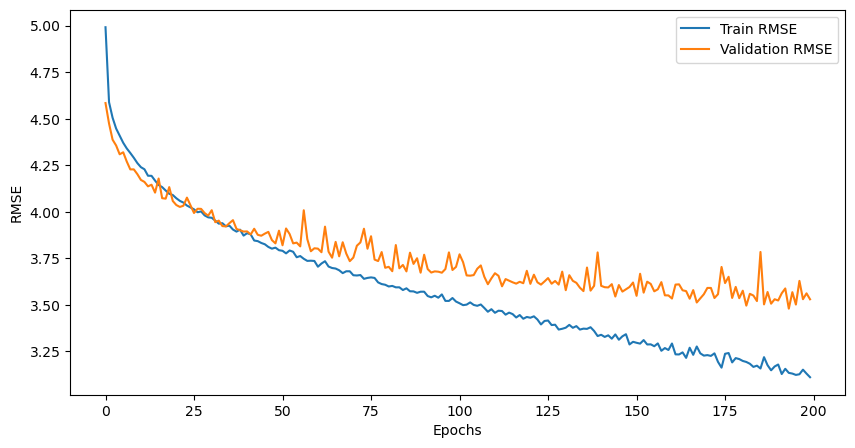

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step
Predictions for the entire dataset saved to 'rainfall_lgbm_rf_xgb_nn.csv'.


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb.csv')

# 1. Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value', 'rf_aws_value', 'xgb_aws_value']
X = df_no_nulls.drop(columns=protected_features)  # Feature set
y = df_no_nulls['aws_value']  # Target variable

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize the features for the neural network
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 4. Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# 5. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# 6. Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

# 7. Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 8. Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['rmse'], label='Train RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# 9. Make predictions for the entire dataset
# X_scaled = scaler.transform(X)
y_pred_full = model.predict(X).flatten()

# Add the predictions as a new column in the original DataFrame
df_no_nulls['nn_aws_value'] = y_pred_full

# Save the updated DataFrame to a new CSV file
df_no_nulls.to_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv', index=False)
print("Predictions for the entire dataset saved to 'rainfall_lgbm_rf_xgb_nn.csv'.")

# Ensembler lgbm

Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 27884, number of used features: 4
[LightGBM] [Info] Start training from score 2.670080
Training until validation scores don't improve for 200 rounds
[10]	valid_0's rmse: 4.38558
[20]	valid_0's rmse: 3.9999
[30]	valid_0's rmse: 3.79254
[40]	valid_0's rmse: 3.68935
[50]	valid_0's rmse: 3.64387
[60]	valid_0's rmse: 3.6265
[70]	valid_0's rmse: 3.62523
[80]	valid_0's rmse: 3.62943
[90]	valid_0's rmse: 3.63651
[100]	valid_0's rmse: 3.64352
[110]	valid_0's rmse: 3.64973
[120]	valid_0's rmse: 3.65502
[130]	valid_0's rmse: 3.66035
[140]	valid_0's rmse: 3.66465
[150]	valid_0's rmse: 3.66803
[160]	valid_0's rmse: 3.67201
[170]	valid_0's rmse: 3.67446
[180]	valid_0's rmse: 3.67635
[190]	valid_0's rmse: 3.67809
[200]	valid

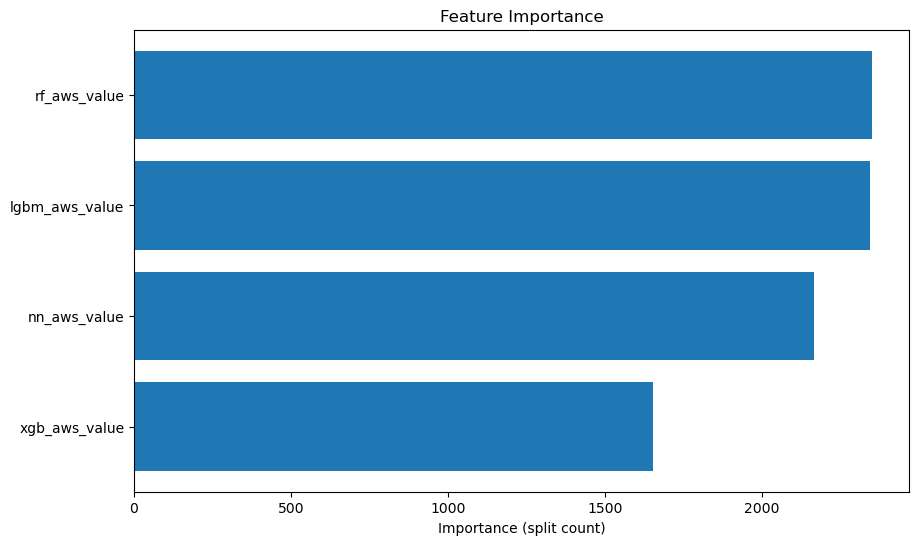

In [30]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the first dataset (no nulls)
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv')

# 1. Prepare the data for training
# protected_features = ['timestamp', 'row', 'col', 'aws_value', "lgbm_aws_value", 'rf_aws_value', 'xgb_aws_value']  # Exclude these from features, 'I2B', 'B14B', 'IRB', 'B11B', 'TCW', 'B16B'
X = df_no_nulls.drop(columns=protected_features)  # Feature set
X = df_no_nulls[['lgbm_aws_value', "rf_aws_value", "xgb_aws_value", "nn_aws_value"]] #, , , 'nn_aws_value', 'adaboost_aws_value'
y = df_no_nulls['aws_value']  # Target variable

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the LightGBM model
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 128,
    'feature_fraction': 0.9
}

# Use callbacks to implement early stopping
print("Training LightGBM model...")
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=200), lgb.log_evaluation(10)]
)

# 4. Make predictions on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 5. Calculate RMSE and R² metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 6. Plot feature importance
importance = model.feature_importance(importance_type='split')
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance (split count)')
plt.show()



# Ensembler ada

Training AdaBoost model...
RMSE: 3.7138
R²: 0.4594


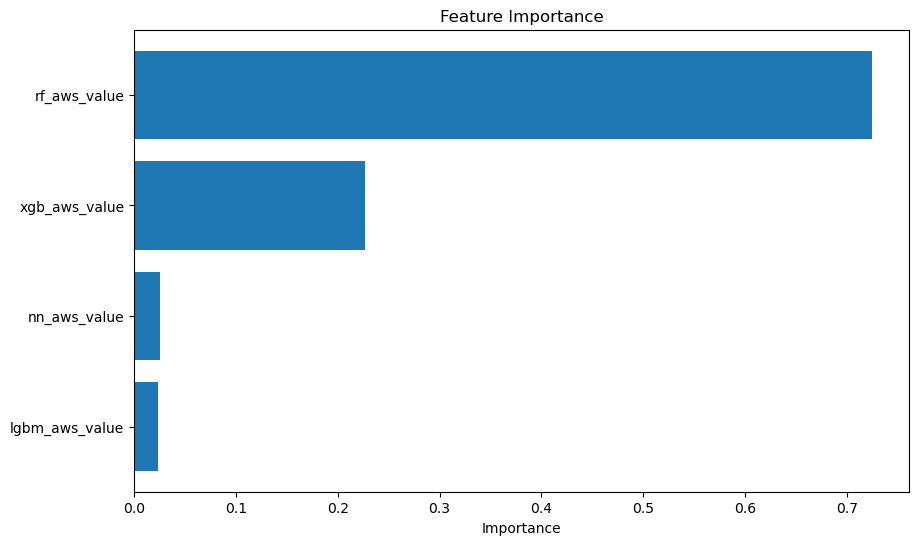

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv')

# 1. Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value', 'rf_aws_value', 'xgb_aws_value', 'nn_aws_value']
X = df_no_nulls.drop(columns=protected_features)  # Feature set
X = df_no_nulls[['lgbm_aws_value', "rf_aws_value", "xgb_aws_value", 'nn_aws_value']] #, , , 'nn_aws_value', 'adaboost_aws_value'
y = df_no_nulls['aws_value']  # Target variable

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the AdaBoost model
# Using DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=16, max_leaf_nodes=128, min_samples_split=3, min_samples_leaf=3)  # Depth can be tuned
model = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,         # Number of boosting rounds
    learning_rate=0.03,       # Can also be tuned
    random_state=42
)

print("Training AdaBoost model...")
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate RMSE and R² metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 6. Feature importance
# Get feature importances and visualize
importance = model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


# Ensembler RF

Training Random Forest model...
RMSE: 3.7210
R²: 0.4574


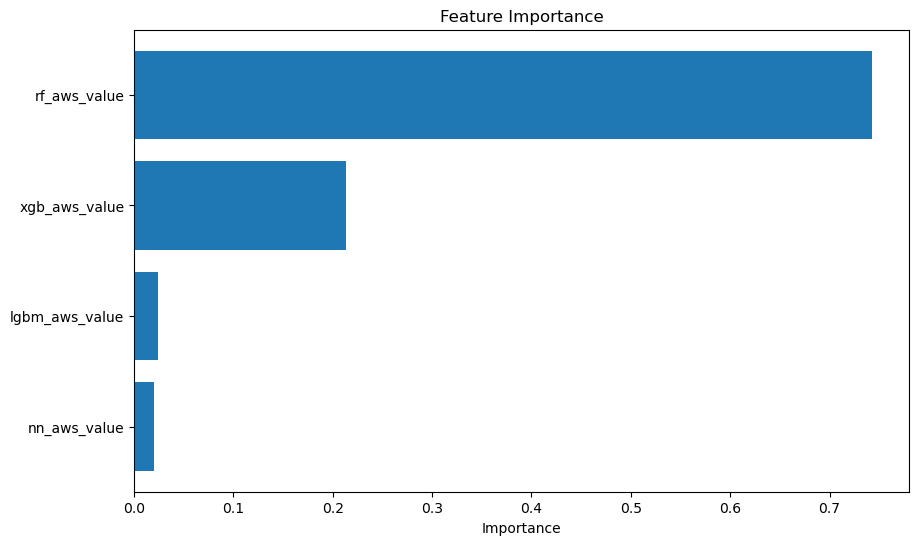

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv')

# 1. Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value']  # Exclude these from features
X = df_no_nulls.drop(columns=protected_features)  # Feature set
X = df_no_nulls[['lgbm_aws_value',"rf_aws_value", "xgb_aws_value", "nn_aws_value"]] #, , , 'nn_aws_value', 'adaboost_aws_value'

y = df_no_nulls['aws_value']  # Target variable

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest model
print("Training Random Forest model...")
model = RandomForestRegressor(
    n_estimators=100,         # Number of trees
    max_depth=8,             # Maximum depth of each tree
    min_samples_split=3,      # Minimum samples required to split a node
    min_samples_leaf=3,       # Minimum samples required at each leaf node
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate RMSE and R² metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 6. Plot feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


# Ensembler XGB

[0]	eval-rmse:5.02441	train-rmse:5.04607
[1]	eval-rmse:4.99728	train-rmse:5.00380
[2]	eval-rmse:4.97060	train-rmse:4.96203
[3]	eval-rmse:4.94434	train-rmse:4.92072
[4]	eval-rmse:4.91848	train-rmse:4.87988
[5]	eval-rmse:4.89306	train-rmse:4.83953
[6]	eval-rmse:4.86808	train-rmse:4.79963
[7]	eval-rmse:4.84344	train-rmse:4.76019
[8]	eval-rmse:4.81925	train-rmse:4.72119
[9]	eval-rmse:4.79557	train-rmse:4.68264
[10]	eval-rmse:4.77236	train-rmse:4.64453
[11]	eval-rmse:4.74935	train-rmse:4.60685
[12]	eval-rmse:4.72716	train-rmse:4.56963
[13]	eval-rmse:4.70501	train-rmse:4.53284
[14]	eval-rmse:4.68317	train-rmse:4.49648
[15]	eval-rmse:4.66209	train-rmse:4.46054
[16]	eval-rmse:4.64107	train-rmse:4.42499
[17]	eval-rmse:4.62062	train-rmse:4.38989
[18]	eval-rmse:4.60017	train-rmse:4.35514
[19]	eval-rmse:4.58025	train-rmse:4.32084
[20]	eval-rmse:4.56089	train-rmse:4.28697
[21]	eval-rmse:4.54193	train-rmse:4.25349
[22]	eval-rmse:4.52302	train-rmse:4.22035
[23]	eval-rmse:4.50472	train-rmse:4.18765
[2

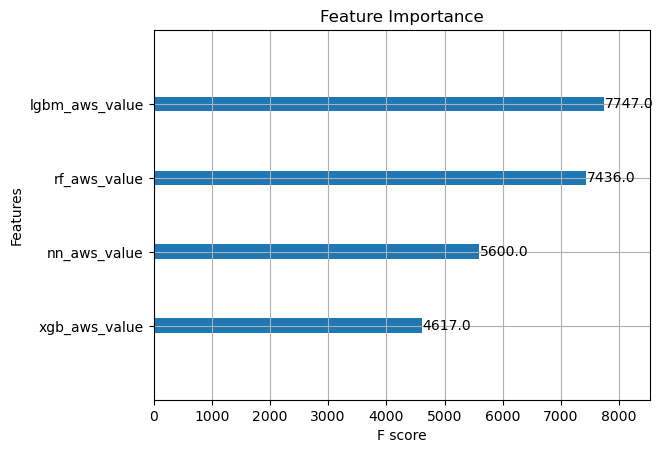

In [6]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv')

# 1. Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value']  # Exclude these from features
X = df_no_nulls.drop(columns=protected_features)  # Feature set
X = df_no_nulls[["rf_aws_value", "xgb_aws_value",'lgbm_aws_value','nn_aws_value']] #, , , 'nn_aws_value', 'adaboost_aws_value'


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 16,
    'max_leaves': 128
}

# Train the model
evals = [(dtest, 'eval'), (dtrain, 'train')]
model = xgb.train(params, dtrain, num_boost_round=200, evals=evals, early_stopping_rounds=50)

# Make predictions
y_pred = model.predict(dtest)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()



# Ensembler NN

Epoch 1/30


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


872/872 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 29.2847 - rmse: 5.4105 - val_loss: 29.8225 - val_rmse: 5.4610
Epoch 2/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 28.6273 - rmse: 5.3436 - val_loss: 28.3279 - val_rmse: 5.3224
Epoch 3/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 25.2236 - rmse: 5.0207 - val_loss: 26.8718 - val_rmse: 5.1838
Epoch 4/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 23.5922 - rmse: 4.8559 - val_loss: 25.4654 - val_rmse: 5.0463
Epoch 5/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 24.1979 - rmse: 4.9069 - val_loss: 24.1388 - val_rmse: 4.9131
Epoch 6/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 20.2192 - rmse: 4.4910 - val_loss: 22.8449 - val_rmse: 4.7796
Epoch 7/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 19.5578 - rmse: 4.4197 - val_loss: 21.5842 - val_rmse: 4.6459
Epoch 8/30
872/872 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 19.5386 - rmse: 4.4165 - val_loss: 20.3895 - val_rmse: 4.5155
Epoch 9/30
872/872 ━━

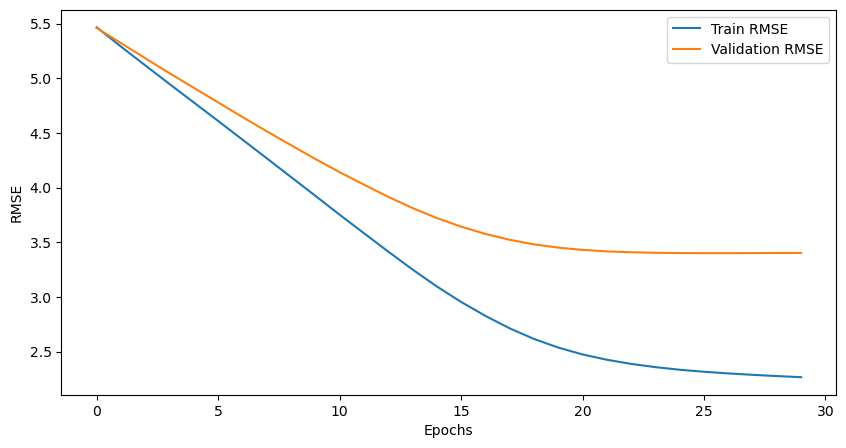

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step
Predictions for the entire dataset saved to 'meta_nn_final.csv'.


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df_no_nulls = pd.read_csv('ensemble_data/rainfall_lgbm_rf_xgb_nn.csv')

# 1. Prepare the data for training
protected_features = ['timestamp', 'row', 'col', 'aws_value', 'lgbm_aws_value']  # Exclude these from features
X = df_no_nulls.drop(columns=protected_features)  # Feature set
X = df_no_nulls[['lgbm_aws_value',"rf_aws_value", "xgb_aws_value",'nn_aws_value']] #, , , 'nn_aws_value', 'adaboost_aws_value'
# X = df_no_nulls[['lgbm_aws_value',"rf_aws_value"]] #, , , 'nn_aws_value', 'adaboost_aws_value'

y = df_no_nulls['aws_value']  # Target variable

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize the features for the neural network
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 4. Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# 5. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# 6. Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# 7. Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# 8. Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['rmse'], label='Train RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()
# 9. Make predictions for the entire dataset
# X_scaled = scaler.transform(X)
y_pred_full = model.predict(X).flatten()

# Add the predictions as a new column in the original DataFrame
df_no_nulls['ensemble_aws_value'] = y_pred_full

# Save the updated DataFrame to a new CSV file
df_no_nulls.to_csv('ensemble_data/meta_nn_final.csv', index=False)
print("Predictions for the entire dataset saved to 'meta_nn_final.csv'.")